TASK - 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (directly assigned instead of using input())
customers_path = r"C:\Users\valla\Downloads\nagendra\Customers.csv"
products_path = r"C:\Users\valla\Downloads\nagendra\Products.csv"
transactions_path = r"C:\Users\valla\Downloads\nagendra\Transactions.csv"

# Load datasets
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)


In [5]:
# EDA: Display basic information about the datasets
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [6]:
# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Merge datasets for analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

In [8]:
# Convert date columns to datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [9]:
# Top customers by total spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Spending:")
print(top_customers)



Top 10 Customers by Total Spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


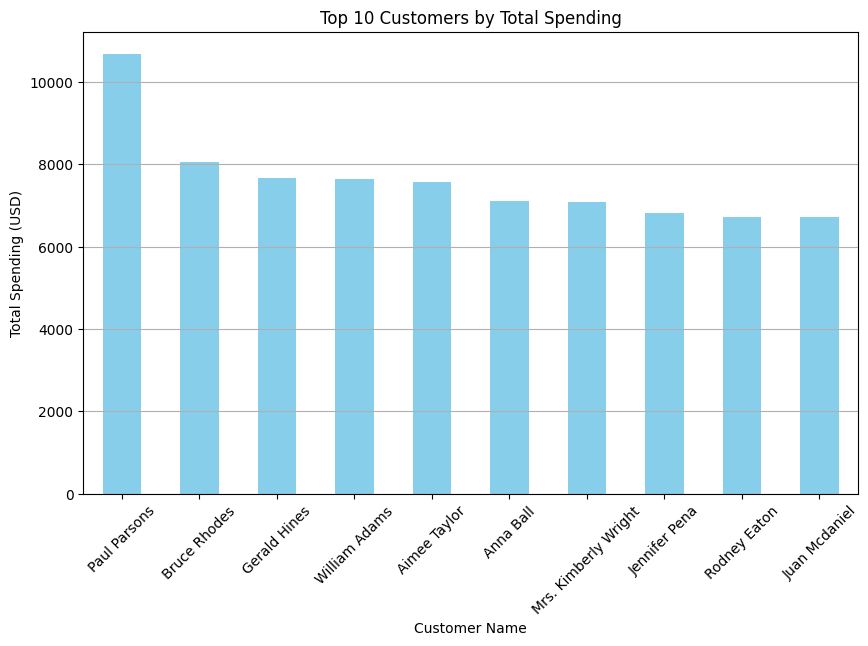

In [10]:
# Plot top customers by spending
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Total Spending')
plt.ylabel('Total Spending (USD)')
plt.xlabel('Customer Name')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [11]:
# Top products by sales
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales Quantity:")
print(product_sales)


Top 10 Products by Sales Quantity:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


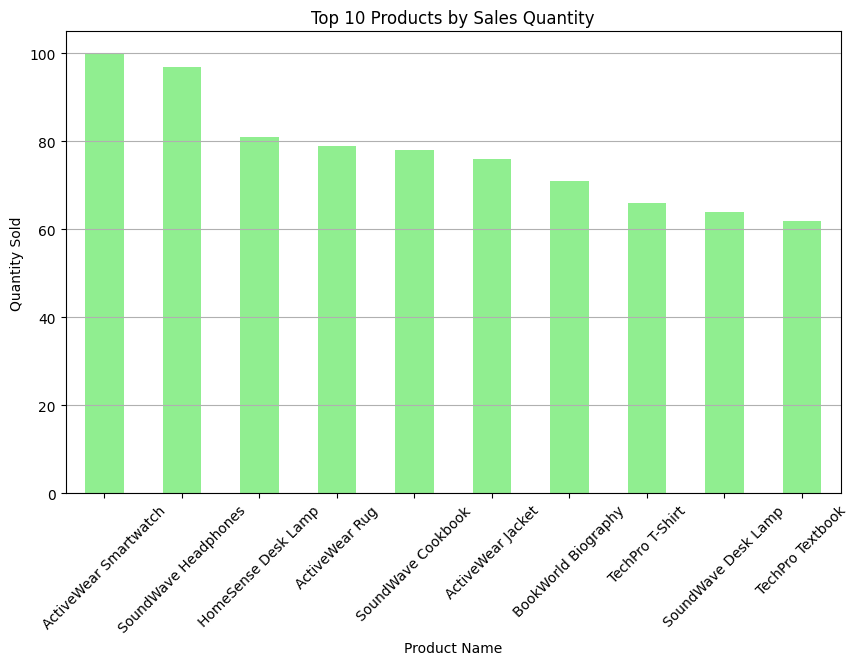

In [12]:
# Plot top products by sales
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Sales Quantity')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [13]:
# Sales trends over time
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
sales_trends = merged_data.groupby('YearMonth')['TotalValue'].sum()

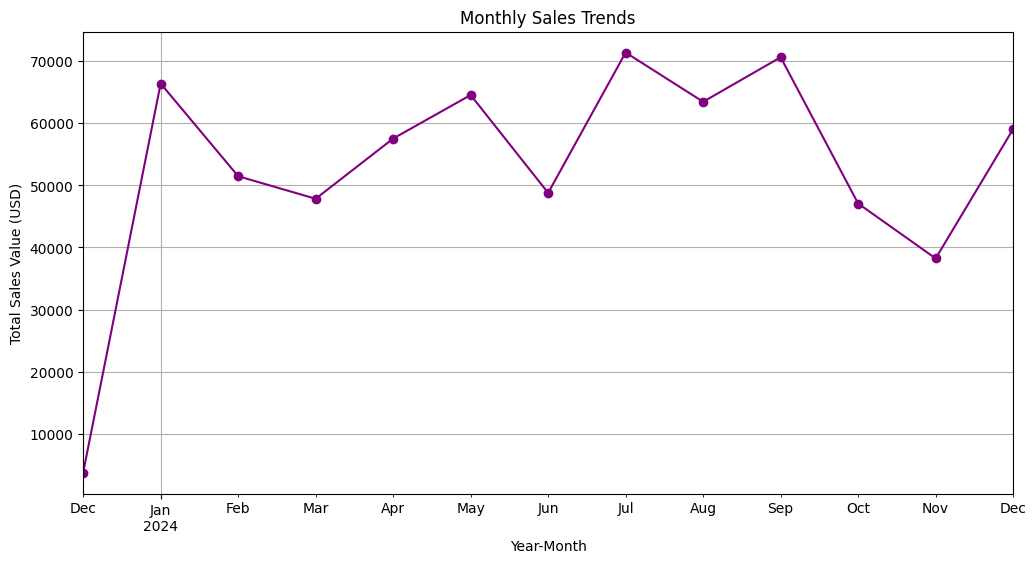

In [14]:
# Plot sales trends
plt.figure(figsize=(12, 6))
sales_trends.plot(title='Monthly Sales Trends', marker='o', color='purple')
plt.ylabel('Total Sales Value (USD)')
plt.xlabel('Year-Month')
plt.grid()
plt.show()


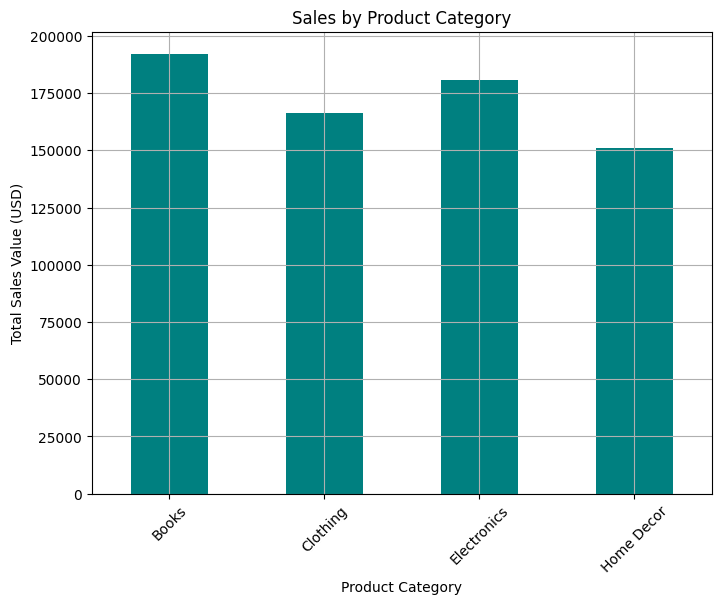

In [15]:
# Sales by category
category_sales = merged_data.groupby('Category')['TotalValue'].sum()

# Plot sales by category
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', title='Sales by Product Category', color='teal')
plt.ylabel('Total Sales Value (USD)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.grid()
plt.show()

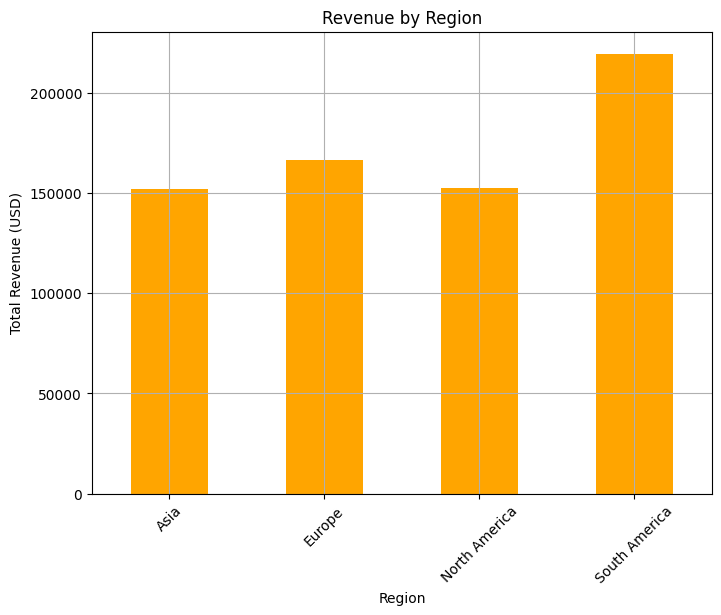

In [16]:
# Region-wise revenue
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()

# Plot revenue by region
plt.figure(figsize=(8, 6))
region_revenue.plot(kind='bar', title='Revenue by Region', color='orange')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid()
plt.show()

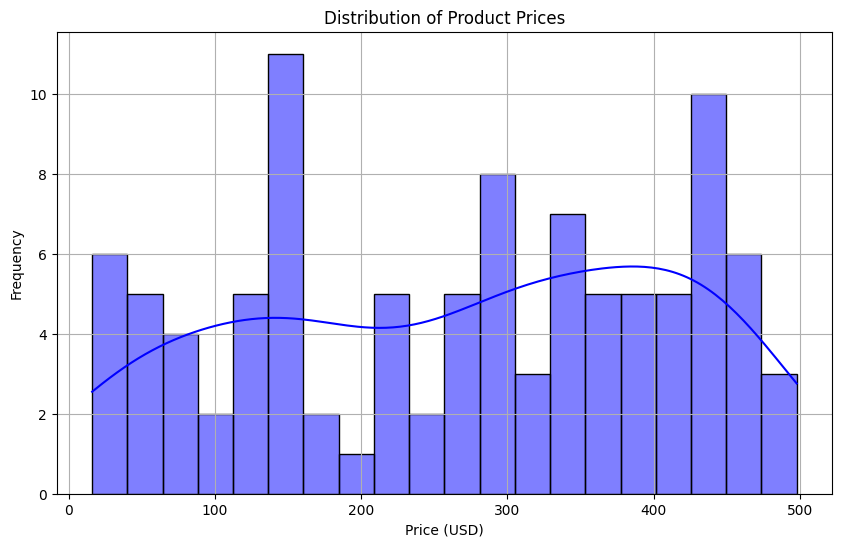

In [17]:
# Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
# Insights
print("\nBusiness Insights:")
print("1. The top 10 customers contribute significantly to the overall revenue, as shown in the bar chart, emphasizing the importance of maintaining these relationships.")
print("2. The bar chart of top-selling products highlights that certain products dominate sales volume, which should inform inventory management and promotions.")
print("3. The sales trend graph reveals seasonal patterns, suggesting opportunities for targeted marketing during peak periods.")
print("4. The bar chart for regional revenue shows high-performing regions, while underperforming regions indicate potential for expansion or targeted strategies.")
print("5. The product price distribution indicates a wide range of pricing, suggesting a diverse product portfolio catering to different customer segments.")


Business Insights:
1. The top 10 customers contribute significantly to the overall revenue, as shown in the bar chart, emphasizing the importance of maintaining these relationships.
2. The bar chart of top-selling products highlights that certain products dominate sales volume, which should inform inventory management and promotions.
3. The sales trend graph reveals seasonal patterns, suggesting opportunities for targeted marketing during peak periods.
4. The bar chart for regional revenue shows high-performing regions, while underperforming regions indicate potential for expansion or targeted strategies.
5. The product price distribution indicates a wide range of pricing, suggesting a diverse product portfolio catering to different customer segments.


TASK-2

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
# Feature Engineering: Create customer-product matrix
customer_product_matrix = merged_data.pivot_table(
    index='CustomerID', 
    columns='ProductID', 
    values='Quantity', 
    aggfunc='sum', 
    fill_value=0
)

# Compute similarity matrix
similarity_matrix = cosine_similarity(customer_product_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)



In [24]:
# Function to get lookalike recommendations for a given customer
def get_lookalikes(customer_id, top_n=3):
    if customer_id in similarity_df.index:
        similar_customers = (
            similarity_df[customer_id]
            .sort_values(ascending=False)
            .drop(customer_id)  # Exclude the customer itself
            .head(top_n)  # Top N similar customers
        )
        return similar_customers
    else:
        print(f"Customer ID {customer_id} not found in the dataset.")
        return None


In [25]:
# Generate Lookalike Recommendations for Customers C0001 - C0020
lookalike_dict = {}
for customer_id in customers['CustomerID'][:20]:
    if customer_id in similarity_df.index:
        similar_customers = (
            similarity_df[customer_id]
            .sort_values(ascending=False)
            .drop(customer_id)  # Exclude the customer itself
            .head(3)  # Top 3 similar customers
        )
        lookalike_dict[customer_id] = list(similar_customers.items())

In [27]:
import json

In [28]:
# Save Lookalike Recommendations to Lookalike.csv
lookalike_csv_data = []
for cust_id, lookalikes in lookalike_dict.items():
    lookalike_csv_data.append({
        "CustomerID": cust_id,
        "Lookalikes": json.dumps([{"CustomerID": l[0], "Score": l[1]} for l in lookalikes])
    })

lookalike_df = pd.DataFrame(lookalike_csv_data)
lookalike_df.to_csv("Lookalike.csv", index=False)

In [29]:
# Interactive user input for lookalike recommendations
while True:
    input_customer_id = input("Enter a CustomerID to find lookalikes (or type 'exit' to quit): ")
    if input_customer_id.lower() == 'exit':
        break
    lookalikes = get_lookalikes(input_customer_id)
    if lookalikes is not None:
        print(f"Top {len(lookalikes)} lookalikes for Customer {input_customer_id}:")
        print(lookalikes)

# Print confirmation
print("Lookalike recommendations saved to Lookalike.csv.")

Enter a CustomerID to find lookalikes (or type 'exit' to quit):  C0001


Top 3 lookalikes for Customer C0001:
CustomerID
C0097    0.547723
C0194    0.469668
C0199    0.438178
Name: C0001, dtype: float64


Enter a CustomerID to find lookalikes (or type 'exit' to quit):  C0020


Top 3 lookalikes for Customer C0020:
CustomerID
C0026    0.617213
C0007    0.588348
C0104    0.488678
Name: C0020, dtype: float64


Enter a CustomerID to find lookalikes (or type 'exit' to quit):  exit


Lookalike recommendations saved to Lookalike.csv.


In [31]:
import numpy as np

In [32]:
# Evaluation Criteria: Assess recommendations
print("\nEvaluating the model...")
all_scores = []
for customer_id in customers['CustomerID'][:20]:
    if customer_id in similarity_df.index:
        similar_customers = get_lookalikes(customer_id, top_n=3)
        if similar_customers is not None:
            # Ground truth: Customers with similar purchasing patterns (simplified as top N most purchased overlap)
            ground_truth = merged_data[merged_data['CustomerID'] == customer_id]['ProductID'].values
            recommended = similar_customers.index.values
            scores = [len(set(ground_truth) & set(merged_data[merged_data['CustomerID'] == r]['ProductID'].values)) for r in recommended]
            all_scores.extend(scores)

# Calculate average overlap score
average_score = np.mean(all_scores) if all_scores else 0
print(f"Average similarity score (based on overlap in products purchased): {average_score:.2f}")



Evaluating the model...
Average similarity score (based on overlap in products purchased): 1.23


TASK 3

In [36]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [37]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Aggregate data for customer profiling
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique'
}).reset_index()

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'TransactionDate']])

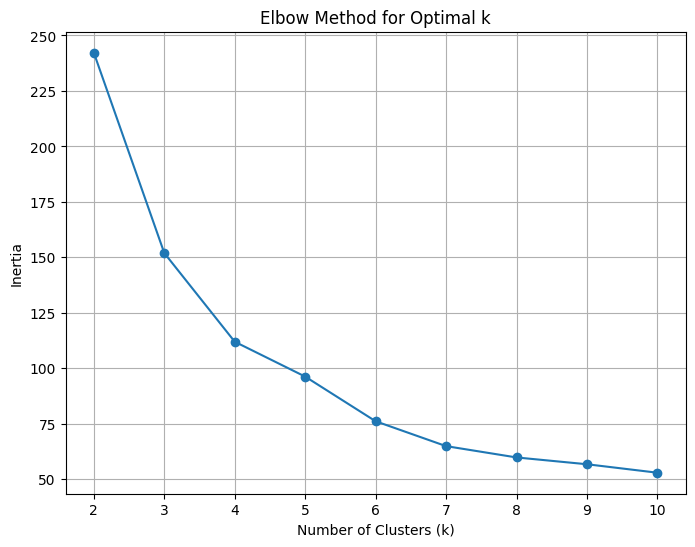

In [38]:

# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


DB Index: 0.8650620583623065


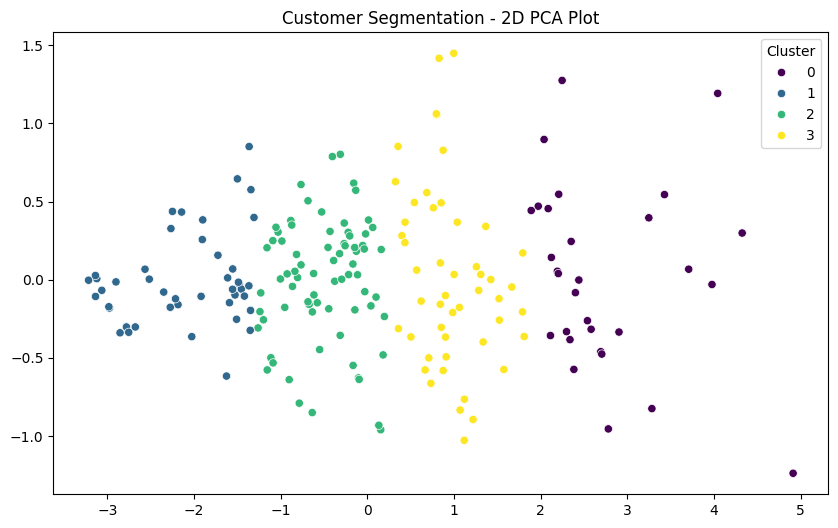

In [40]:
# Choose optimal number of clusters (let's assume it's 4 based on the elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_profile['Cluster'])
print(f"DB Index: {db_index}")

# Visualize the clusters using a 2D plot (PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_profile['Cluster'], palette='viridis')
plt.title('Customer Segmentation - 2D PCA Plot')
plt.show()